In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# ODE vector field visualizations
This notebook shows examples of functions Neural ODEs cannot approximate and how this affects the learned vector fields.

#### Create an ODE function

In [2]:
from anode.models import ODEFunc

data_dim = 1  # We model 1d data to easily visualize it
hidden_dim = 16

# Create a 3-layer MLP as the ODE function f(h, t)
odefunc = ODEFunc(device, data_dim, hidden_dim, time_dependent=True)

#### Visualize vector field of ODE function
We can visualize what the randomly initialized ODE function's vector field looks like.

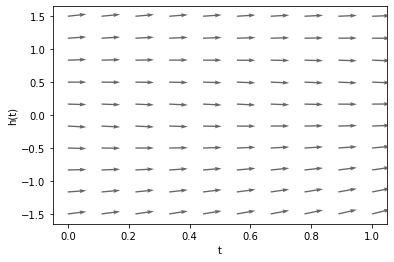

In [3]:
from viz.plots import vector_field_plt

vector_field_plt(odefunc, num_points=10, timesteps=10, 
                 h_min=-1.5, h_max=1.5)

## Create functions to approximate

We will approximate two functions: an easy one (the identity mapping) and a hard one (correspond to g_1d in the paper)

In [4]:
from experiments.dataloaders import Data1D
from torch.utils.data import DataLoader

data_easy = Data1D(num_points=500, target_flip=False)
data_hard = Data1D(num_points=500, target_flip=True)

dataloader_easy = DataLoader(data_easy, batch_size=32, shuffle=True)
dataloader_hard = DataLoader(data_hard, batch_size=32, shuffle=True)

#### Visualize the data

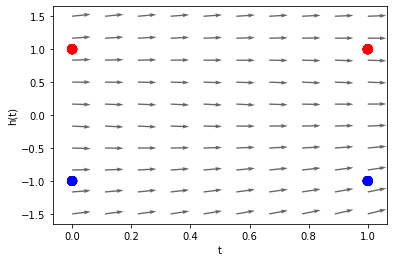

In [5]:
for inputs, targets in dataloader_easy:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

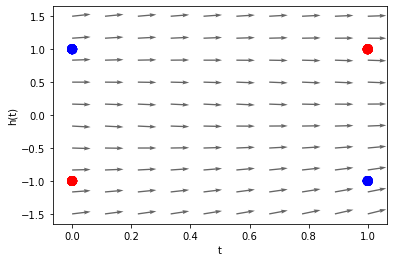

In [6]:
for inputs, targets in dataloader_hard:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

## Train a model on data

We can now try to fit a Neural ODE to the two functions

In [7]:
from anode.models import ODEBlock
from anode.training import Trainer

data_dim = 1
hidden_dim = 16

# Create a model for the easy function
odefunc_easy = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_easy = ODEBlock(device, odefunc_easy)

# Create a model for the hard function
odefunc_hard = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_hard = ODEBlock(device, odefunc_hard)

# Create an optimizer and trainer for easy function
optimizer_easy = torch.optim.Adam(model_easy.parameters(), lr=1e-3)
trainer_easy = Trainer(model_easy, optimizer_easy, device, print_freq=5)

# Create an optimizer and trainer for hard function
optimizer_hard = torch.optim.Adam(model_hard.parameters(), lr=5e-4)
trainer_hard = Trainer(model_hard, optimizer_hard, device, print_freq=5)

#### Train model on easy data

In [8]:
trainer_easy.train(dataloader_easy, num_epochs=10)


Iteration 0/16
Loss: 0.001
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 0.000

Ite

#### Visualize model trajectories
As can be seen, the learned vector field maps the inputs to targets correctly.

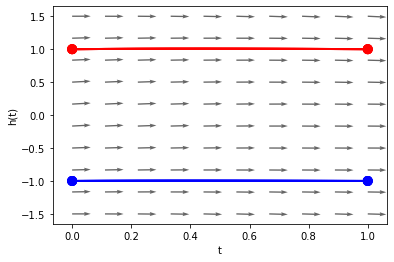

In [9]:
for inputs, targets in dataloader_easy:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_easy, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_easy)

#### Train model on hard data

In [10]:
trainer_hard.train(dataloader_hard, num_epochs=50)


Iteration 0/16
Loss: 1.531
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.524
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.509
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.501
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 1.515

Iteration 0/16
Loss: 1.494
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.486
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.469
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.467
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 1.479

Iteration 0/16
Loss: 1.461
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.441
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.435
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 1.432
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 1.444

Iteration 0/16
Loss: 1.428
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.422
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.401
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.399
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 1.409

Ite


Iteration 5/16
Loss: 0.554
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/16
Loss: 0.553
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 15/16
Loss: 0.545
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 34: 0.553

Iteration 0/16
Loss: 0.536
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 5/16
Loss: 0.546
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/16
Loss: 0.555
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 15/16
Loss: 0.524
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 35: 0.548

Iteration 0/16
Loss: 0.564
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.549
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/16
Loss: 0.552
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 15/16
Loss: 0.560
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 36: 0.545

Iteration 0/16
Loss: 0.547
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 5/16
Loss: 0.534
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/16
Loss: 0.548
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 15/16
Loss: 0.546
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 37: 0.541

Iteration 0/16
Loss: 0.532
NFE: 26
BNFE: 0
Total NFE: 26


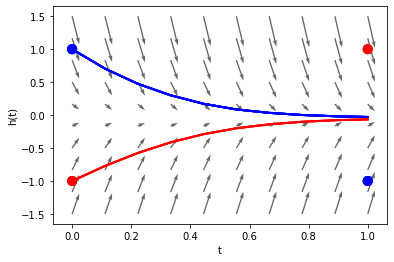

In [11]:
for inputs, targets in dataloader_hard:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_hard, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_hard)

## Augmented Neural ODEs
As can be seen, Neural ODEs struggle to fit the hard function. In fact, it can be proven that Neural ODEs cannot represent this function. In order to overcome this, we can use Augmented Neural ODEs which extend the space on which the ODE is solved. Examples of this are shown in the `augmented-neural-ode-example` notebook.